In [1]:
from multiprocessing import Pool
from itertools import product
from scipy import stats
from scipy.optimize import curve_fit

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import seaborn as sns

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
dir_data = r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Data_input"
xls = r"DEA_inout.xlsx"

file_path = r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Data_input\city_efficency"
file_path_strong_dis = r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Data_input\eff_strong_reg"

<IPython.core.display.Javascript object>

In [3]:
def load_pickle(
    iteration, columns=["scalingFacotr_b_0", "scalingFacotr_b_1"], file_path=file_path
):
    pickle_ls = os.listdir(file_path)
    os.chdir(file_path)
    with open(pickle_ls[iteration], "rb") as file:
        results = pickle.load(file)
    efficiency_results = results.loc[:, columns]
    return efficiency_results

<IPython.core.display.Javascript object>

In [4]:
def cal_AEE(iteration):
    results_df = load_pickle(iteration)
    results_df.loc[:, iteration] = (
        1 - (results_df.iloc[:, 0] + results_df.iloc[:, 1]) / 2
    )
    contribute_GWP = (1 - results_df.iloc[:, 0]) / 2
    contribute_PM = (1 - results_df.iloc[:, 1]) / 2
    return results_df.loc[:, [iteration]], contribute_GWP, contribute_PM

<IPython.core.display.Javascript object>

In [5]:
def concat_df(iteration, DMU_columns=["City name", "year"]):
    AEE_ls = []
    AEE_ls_GWP = []
    AEE_ls_PM = []
    for iteration in range(iteration):
        eff_total, eff_GWP, eff_PM = cal_AEE(iteration)
        AEE_ls.append(eff_total)
        AEE_ls_GWP.append(eff_GWP)
        AEE_ls_PM.append(eff_PM)
    AEE_df = pd.concat(AEE_ls, axis=1)
    AEE_df_GWP = pd.concat(AEE_ls_GWP, axis=1)
    AEE_df_PM = pd.concat(AEE_ls_PM, axis=1)
    DMU_df = load_pickle(0, columns=DMU_columns)
    DMU_cluster = pd.DataFrame(
        [
            "Central",
            "Eastern",
            "Western",
            "Eastern",
            "Western",
            "Eastern",
            "Western",
            "Western",
            "Eastern",
            "Eastern",
            "Central",
            "Central",
            "Central",
            "Central",
            "Western",
            "Eastern",
            "Central",
            "Central",
            "Eastern",
            "Western",
            "Western",
            "Western",
            "Eastern",
            "Eastern",
            "Central",
            "Western",
            "Eastern",
            "Western",
            "Western",
            "Eastern",
        ]
        * 5,
        columns=["region"],
    )
    DMU_AEE_df = pd.concat([DMU_cluster, DMU_df, AEE_df], axis=1)
    DMU_AEE_df_GWP = pd.concat([DMU_cluster, DMU_df, AEE_df_GWP], axis=1)
    DMU_AEE_df_PM = pd.concat([DMU_cluster, DMU_df, AEE_df_PM], axis=1)
    return DMU_AEE_df, DMU_AEE_df_GWP, DMU_AEE_df_PM

<IPython.core.display.Javascript object>

In [6]:
iteration = 1000

<IPython.core.display.Javascript object>

In [7]:
%%time
AEE_df, AEE_df_GWP, AEE_df_PM = concat_df(iteration)

Wall time: 17.2 s


<IPython.core.display.Javascript object>

In [8]:
AEE_df_sort = AEE_df.sort_values(["year", "region"])

<IPython.core.display.Javascript object>

In [9]:
AEE_df_sort[AEE_df_sort["City name"].str.contains("Shanghai")]

,region,City name,year,0,1,2,3,4,5,6,...,990,991,992,993,994,995,996,997,998,999
23,Eastern,Shanghai,2013,1.00000,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.0000,1.00000
53,Eastern,Shanghai,2014,0.85365,1.0000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,0.76115,1.00000,0.72620,0.77795,0.76515,1.0000,1.00000
83,Eastern,Shanghai,2015,0.51695,0.5151,0.57235,0.57735,0.59140,0.49355,0.47455,...,0.46130,0.56835,0.45455,0.44935,0.41610,0.45770,0.42230,0.44440,0.5014,0.50360
113,Eastern,Shanghai,2016,0.21370,0.2089,0.21200,0.20950,0.22755,0.20490,0.21635,...,0.23800,0.23945,0.17420,0.17880,0.25990,0.19340,0.22085,0.21310,0.1946,0.21965
143,Eastern,Shanghai,2017,0.22390,0.1943,0.20165,0.26590,0.24415,0.17365,0.20880,...,0.18255,0.22400,0.16975,0.17130,0.20755,0.18955,0.18050,0.20285,0.2196,0.18170


<IPython.core.display.Javascript object>

In [10]:
def boxp_data(data, year):
    data_slice = list(range(0, 151, 30))
    start = data_slice[year - 2013]
    end = data_slice[year - 2012]
    plot_data = np.array(data.iloc[start:end, 3:])
    return plot_data

<IPython.core.display.Javascript object>

In [11]:
def boxplot(data, color, pos):
    boxp = ax.boxplot(
        data,
        showfliers=False,
        widths=0.15,
        whis=[5, 95],
        patch_artist=True,
        vert=True,
        positions=pos,
    )
    for patch in boxp["boxes"]:
        patch.set(facecolor=color, alpha=0.5)
    return boxplot

<IPython.core.display.Javascript object>

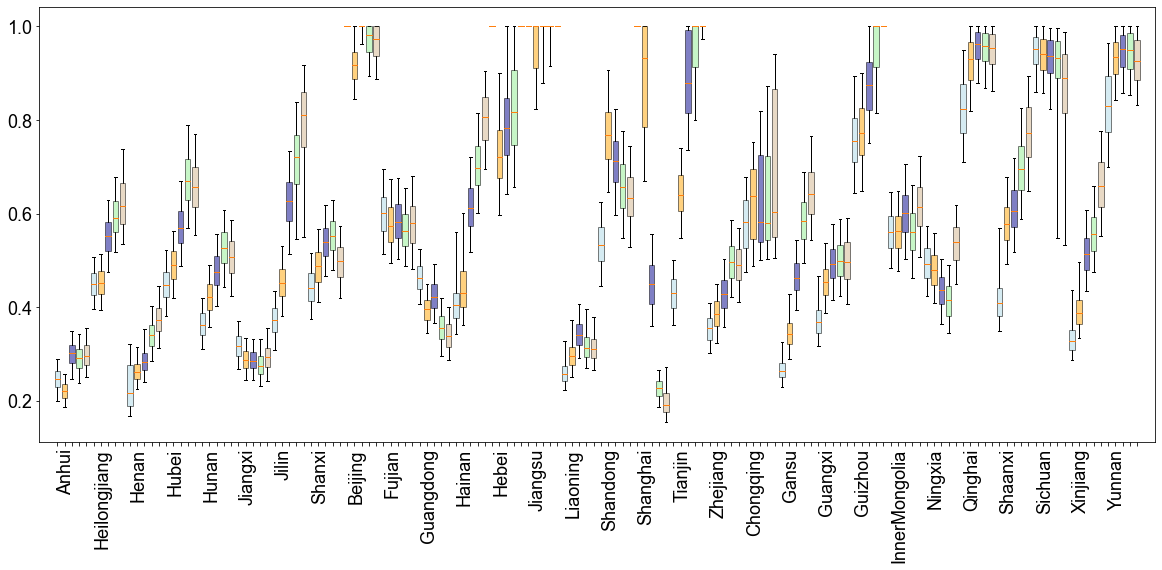

<IPython.core.display.Javascript object>

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.yticks(fontname="Arial", fontsize=18)
plt.xticks(fontname="Arial", fontsize=18, rotation=90)
boxp2013 = boxplot(
    boxp_data(AEE_df_sort, 2013).T, "lightblue", [i - 0.4 for i in range(30)]
)
boxp2014 = boxplot(
    boxp_data(AEE_df_sort, 2014).T, "orange", pos=[i - 0.2 for i in range(30)]
)
boxp2015 = boxplot(
    boxp_data(AEE_df_sort, 2015).T, "darkblue", pos=[i for i in range(30)]
)
boxp2016 = boxplot(
    boxp_data(AEE_df_sort, 2016).T, "lightgreen", pos=[i + 0.2 for i in range(30)]
)
boxp2017 = boxplot(
    boxp_data(AEE_df_sort, 2017).T, "tan", pos=[i + 0.4 for i in range(30)]
)


ax.xaxis.set_label_coords(-1, 1.02)
ax.set_xticklabels(AEE_df_sort.loc[:, "City name"][:30], ha="left")

plt.savefig(
    r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Graphs\efficiency.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [13]:
def yearly_average(data, year):
    year_data = boxp_data(data, year)
    average = np.average(year_data)
    return average

<IPython.core.display.Javascript object>

In [14]:
def region_year(data, year, region):
    region_data = data.loc[data["region"] == region]
    year_region_data = region_data.loc[data["year"] == year]
    return year_region_data

<IPython.core.display.Javascript object>

In [15]:
def region_year_average(data, year, region):
    average_efficiency = np.average(
        np.array(region_year(data, year, region).iloc[:, 3:])
    )
    return average_efficiency

<IPython.core.display.Javascript object>

In [16]:
def average_df(data, year_range=range(2013, 2018)):
    nation_average = [yearly_average(data, year) for year in year_range]
    east_average = [
        region_year_average(data, year, region="Eastern") for year in year_range
    ]
    west_average = [
        region_year_average(data, year, region="Western") for year in year_range
    ]
    central_average = [
        region_year_average(data, year, region="Central") for year in year_range
    ]
    return pd.DataFrame(
        [nation_average, east_average, west_average, central_average],
        index=["Nation", "Eastern", "Western", "Central"],
        columns=year_range,
    )

<IPython.core.display.Javascript object>

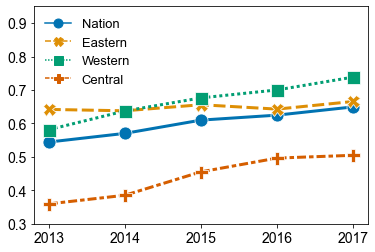

<IPython.core.display.Javascript object>

In [255]:
fig, ax = plt.subplots()
plt.yticks(fontname="Arial", fontsize=14)
plt.xticks(range(2013, 2018, 1), fontname="Arial", fontsize=14)
plt.ylim(0.3, 0.95)

sns.lineplot(
    data=average_df(AEE_df_sort).T,
    palette="colorblind",
    linewidth=3,
    markers=True,
    markersize=13,
    ax=ax,
)
L = ax.legend(fontsize=13, frameon=False, markerscale=1.5,)
plt.setp(L.texts, family="Arial")
plt.savefig(
    r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Graphs\region_efficiency.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [18]:
def contribution(GWP_data, PM_data, year_range=range(2013, 2018)):
    AEE_GWP_ave = [yearly_average(AEE_df_GWP, year) for year in year_range]
    AEE_PM_ave = [yearly_average(AEE_df_PM, year) for year in year_range]
    return pd.DataFrame(
        [AEE_GWP_ave, AEE_PM_ave], index=["GWP", "PM"], columns=year_range
    )

<IPython.core.display.Javascript object>

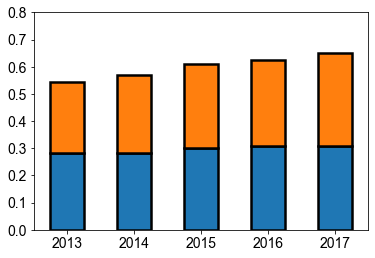

<IPython.core.display.Javascript object>

In [19]:
fig, ax = plt.subplots()
plt.yticks(fontname="Arial", fontsize=14)
plt.xticks(range(2013, 2018, 1), fontname="Arial", fontsize=14)
plt.ylim(0, 0.8)
contribution(AEE_df_GWP, AEE_df_PM).T.plot(
    kind="bar", stacked=True, edgecolor="black", linewidth=2.5, ax=ax
)
plt.xticks(rotation=0)
plt.legend(frameon=False, fontsize=13, loc="upper left").set_visible(False)
plt.savefig(
    r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Graphs\impact_efficiency.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [20]:
average_df(AEE_df_sort)

,2013,2014,2015,2016,2017
Nation,0.544395,0.570310,0.609965,0.624822,0.649456
Eastern,0.641956,0.637806,0.655940,0.642825,0.665667
Western,0.581308,0.637332,0.676417,0.700178,0.738460
Central,0.359492,0.385348,0.455377,0.496455,0.504785


<IPython.core.display.Javascript object>

In [21]:
contribution(AEE_df_GWP, AEE_df_PM)

,2013,2014,2015,2016,2017
GWP,0.284265,0.282067,0.300367,0.307423,0.309886
PM,0.260130,0.288243,0.309598,0.317399,0.339570


<IPython.core.display.Javascript object>

In [22]:
a = AEE_df_sort[AEE_df_sort["City name"] == "Chongqing"]
b = a[a["year"] == 2017].iloc[0, 3:]
b.quantile(0.05), b.quantile(0.95)

(0.5043449999999999, 0.9420575)

<IPython.core.display.Javascript object>

In [23]:
a = AEE_df_sort[AEE_df_sort["City name"] == "Sichuan"]
b = a[a["year"] == 2017].iloc[0, 3:]
b.quantile(0.05), b.quantile(0.95)

(0.5325, 0.9878549999999999)

<IPython.core.display.Javascript object>

In [24]:
a = AEE_df_sort[AEE_df_sort["City name"] == "Shanghai"]
b = a[a["year"] == 2017].iloc[0, 3:]
b.quantile(0.5), b.quantile(0.95)

(0.19224999999999998, 0.271665)

<IPython.core.display.Javascript object>

In [25]:
a = AEE_df_sort[AEE_df_sort["City name"] == "Tianjin"]
b = a[a["year"] == 2017].iloc[0, 3:]
b.quantile(0.5), b.quantile(0.95)

(1.0, 1.0)

<IPython.core.display.Javascript object>

In [26]:
a = AEE_df_sort[AEE_df_sort["City name"] == "Tianjin"]
b = a[a["year"] == 2013].iloc[0, 3:]
b.quantile(0.5), b.quantile(0.95)

(0.43065, 0.5003774999999999)

<IPython.core.display.Javascript object>

In [27]:
def read_excel(iteration):
    dea_inout = pd.read_excel(
        os.path.join(dir_data, xls), sheet_name=str(iteration), header=0
    )
    return dea_inout

<IPython.core.display.Javascript object>

In [28]:
def read_scaling_difference(iteration, columns):
    strong_dis_df = load_pickle(iteration, columns, file_path=file_path_strong_dis,)
    weak_dis_df = load_pickle(iteration, columns)
    difference = strong_dis_df - weak_dis_df
    return difference

<IPython.core.display.Javascript object>

In [29]:
def scaling_difference_df(iterations, columns, DMU_columns=["City name", "year"]):
    scaling_difference_ls = []
    if columns == ["scalingFacotr_y_0"]:
        GDP_data = read_excel(0)["GDP"]
        for iteration in range(iterations):
            regulatory_cost = GDP_data.multiply(
                read_scaling_difference(iteration, columns).iloc[:, 0]
            )
            scaling_difference_ls.append(regulatory_cost)
    elif columns == ["scalingFactor_x_2"]:
        data_file = pd.ExcelFile(os.path.join(dir_data, xls))
        for iteration in range(iterations):
            FDP_data = pd.read_excel(data_file, str(iterations - 1))["FDP"]
            energy_saving = FDP_data.multiply(
                -read_scaling_difference(iteration, columns).iloc[:, 0]
            )
            scaling_difference_ls.append(energy_saving)
    difference = pd.concat(scaling_difference_ls, axis=1)
    DMU_df = load_pickle(0, columns=DMU_columns)
    DMU_cluster = pd.DataFrame(
        [
            "Central",
            "Eastern",
            "Western",
            "Eastern",
            "Western",
            "Eastern",
            "Western",
            "Western",
            "Eastern",
            "Eastern",
            "Central",
            "Central",
            "Central",
            "Central",
            "Western",
            "Eastern",
            "Central",
            "Central",
            "Eastern",
            "Western",
            "Western",
            "Western",
            "Eastern",
            "Eastern",
            "Central",
            "Western",
            "Eastern",
            "Western",
            "Western",
            "Eastern",
        ]
        * 5,
        columns=["region"],
    )
    difference_df = pd.concat([DMU_cluster, DMU_df, difference], axis=1)
    return difference_df

<IPython.core.display.Javascript object>

In [30]:
DMU_columns = ["City name", "year"]
FDP_column = ["scalingFactor_x_2"]
GDP_column = ["scalingFacotr_y_0"]
GWP_column = ["scalingFacotr_b_0"]
PM_column = ["scalingFacotr_b_1"]

<IPython.core.display.Javascript object>

In [31]:
GDP_difference = scaling_difference_df(1000, columns=GDP_column)

<IPython.core.display.Javascript object>

In [32]:
FDP_difference = scaling_difference_df(1000, columns=FDP_column)

<IPython.core.display.Javascript object>

In [33]:
def get_array(data, row_i):
    region = data.iloc[row_i, 0]
    DMU_name = data.iloc[row_i, 1]
    year = data.iloc[row_i, 2]
    array = data.iloc[row_i, 3:]
    return region, DMU_name, year, array

<IPython.core.display.Javascript object>

In [37]:
def making_scatter_data(data):
    data_ls = []
    for row_i in range(len(data)):
        region, name, year, array = get_array(data, row_i)
        array_mean = array.mean()
        data_ls.append(array_mean)
    data_arrary = np.array(data_ls)
    return data_arrary

<IPython.core.display.Javascript object>

In [270]:
def cost_func(GDP, c0, c1):
    return c0 + c1 * GDP


def cost_curve_fit(GDP_data, FDP_data, region):
    FDP_scatter = making_scatter_data(FDP_data[(FDP_data["region"] == region)])
    GDP_scatter = making_scatter_data(GDP_data[(GDP_data["region"] == region)])
    scatter_fit = sorted(list(zip(GDP_scatter, FDP_scatter)))
    scatter_fit_truncat = []
    for i in scatter_fit:
        if i[1] >= 0:
            scatter_fit_truncat.append(i)
    GDP_scatter_sorted = np.array([i[0] for i in scatter_fit_truncat])
    FDP_scatter_sorted = np.array([i[1] for i in scatter_fit_truncat])
    c, cov = curve_fit(cost_func, GDP_scatter_sorted, FDP_scatter_sorted)

    n = len(GDP_scatter_sorted)
    fit_FDP = np.empty(n)
    for i in range(n):
        fit_FDP[i] = cost_func(GDP_scatter_sorted[i], c[0], c[1])
    return c, cov, fit_FDP, GDP_scatter_sorted, FDP_scatter_sorted

<IPython.core.display.Javascript object>

In [297]:
def scatter(GDP_data, FDP_data):

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.yticks(fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14)
    regions = ["Eastern", "Western", "Central"]
    colors = [(0.99, 0.91, 0.15), (0.21, 0.72, 0.47), (0.19, 0.41, 0.56)]
    year_range = range(2013, 2018)
    markers = [
        ",",
        "<",
        "o",
        "v",
        "p",
    ]
    c_list = []
    fit_FDP_list = []
    FDP_scatter_sorted_list = []
    GDP_scatter_sorted_list = []
    for region, color in zip(regions, colors):
        for year, marker in zip(year_range, markers):
            ax.scatter(
                making_scatter_data(
                    GDP_data[
                        (GDP_data["region"] == region) & (GDP_data["year"] == year)
                    ]
                ),
                making_scatter_data(
                    FDP_data[
                        (FDP_data["region"] == region) & (FDP_data["year"] == year)
                    ]
                ),
                s=200,
                color=color,
                marker=marker,
                alpha=0.5,
            )

        c, cov, fit_FDP, GDP_scatter_sorted, FDP_scatter_sorted = cost_curve_fit(
            GDP_data, FDP_data, region,
        )
        c_list.append((c, region))
        fit_FDP_list.append(fit_FDP)
        GDP_scatter_sorted_list.append(GDP_scatter_sorted)
        FDP_scatter_sorted_list.append(FDP_scatter_sorted)
        ax.plot(
            GDP_scatter_sorted, fit_FDP, linewidth=3, color=color, linestyle="dashed"
        )

    return ax, c_list, fit_FDP_list, GDP_scatter_sorted_list, FDP_scatter_sorted_list

<IPython.core.display.Javascript object>

slope = 0.17875753999659236 intercept = -5.377923733044533 p value = 6.165888930607333e-16
slope = 0.07960283850081207 intercept = 7.28265017312815 p value = 6.607068042505574e-09
slope = 0.20382083242482668 intercept = -4.897814152206063 p value = 3.373250669267027e-21


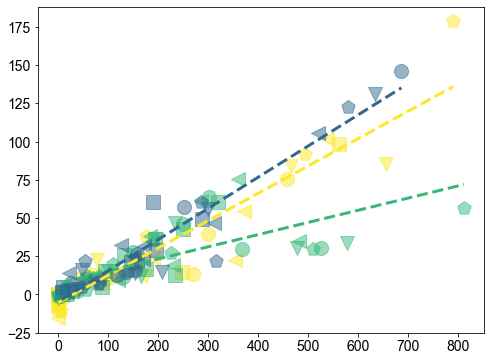

<IPython.core.display.Javascript object>

In [306]:
ax, c_list, fit_FDP_list, GDP_scatter_sorted_list, FDP_scatter_sorted_list = scatter(
    GDP_difference, FDP_difference
)

for i in range(3):
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        GDP_scatter_sorted_list[i], FDP_scatter_sorted_list[i]
    )
    print("slope = {} intercept = {} p value = {}".format(slope, intercept, p_value))

plt.savefig(
    r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Graphs\cost_benef.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [240]:
c_list

[(array([-5.37792375,  0.17875754]), 'Eastern'),
 (array([7.28265033, 0.07960284]), 'Western'),
 (array([-4.8978141 ,  0.20382083]), 'Central')]

<IPython.core.display.Javascript object>

In [116]:
def breakeven_price(GDP_data, FDP_data):
    GDP_df = GDP_data.iloc[:, 3:]
    FDP_df = FDP_data.iloc[:, 3:]

    energy_price = np.average(np.average(GDP_df) / np.average(FDP_df))
    return energy_price

<IPython.core.display.Javascript object>

In [ ]:
    breakeven_df = GDP_df.divide(FDP_df)
    df_restruc = breakeven_df.replace([np.inf, -np.inf], np.nan).fillna(value=0)

In [107]:
def group_bar_data(GDP_data, FDP_data):
    regions = [
        "Eastern",
        "Central",
        "Western",
    ]
    year_range = range(2013, 2018)
    data_dict = {}
    for region in regions:
        ls = []
        for year in year_range:
            data = breakeven_price(
                GDP_data[(GDP_data["region"] == region) & (GDP_data["year"] == year)],
                FDP_data[(FDP_data["region"] == region) & (FDP_data["year"] == year)],
            )
            ls.append(data)
        data_dict[region] = ls
    ls_nation = []
    for year in year_range:
        data = breakeven_price(
            GDP_data[(GDP_data["year"] == year)], FDP_data[(FDP_data["year"] == year)],
        )
        ls_nation.append(data)
    data_dict["nation"] = ls_nation
    data = pd.DataFrame(data_dict, index=year_range)
    return data

<IPython.core.display.Javascript object>

In [117]:
group_bar_data(GDP_difference, FDP_difference)

,Eastern,Central,Western,nation
2013,7.219257,5.312569,6.954461,6.485369
2014,8.699625,5.366506,6.841086,6.698425
2015,9.592415,5.486395,8.307103,7.275128
2016,7.656135,6.064703,10.259457,7.780074
2017,5.353348,6.044105,11.291383,6.960731


<IPython.core.display.Javascript object>

In [119]:
def group_bar_plot(GDP_data, FDP_data):
    data = group_bar_data(GDP_data, FDP_data).reset_index()
    data["index"] = data["index"].astype(str)
    data.set_index("index", inplace=True)
    bar = data.iloc[:, :-1]

    colors = ((0.25, 0.60, 0.84), (0.96, 0.78, 0.40), (0.48, 0.38, 0.73))
    my_cmap = mpl.colors.ListedColormap(colors, name="my_colormap_name")

    fig, ax = plt.subplots()
    data["nation"].plot(
        linestyle="--", linewidth=2, color="grey", marker="o", markersize=10, ax=ax,
    )
    data[["Eastern", "Central", "Western"]].plot(
        kind="bar", cmap=my_cmap, width=0.84, ax=ax
    )
    plt.ylim((0, 16))
    plt.yticks(fontname="Arial", fontsize=14)
    plt.xticks(fontname="Arial", fontsize=14, rotation=0)
    ax.get_legend().remove()

<IPython.core.display.Javascript object>

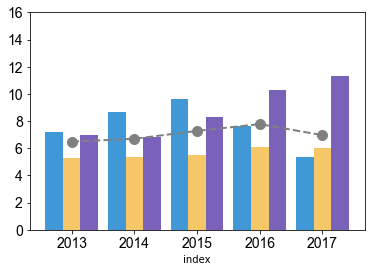

<IPython.core.display.Javascript object>

In [120]:
group_bar_plot(GDP_difference, FDP_difference)

plt.savefig(
    r"E:\tencent files\chrome Download\Research\DEA\DEA_transport\Graphs\cost_benef_groupbar.png",
    transparent=True,
    dpi=600,
    bbox_inches="tight",
)

In [113]:
np.average(
    GDP_difference[GDP_difference["region"] == "Eastern"].iloc[:, 3:].fillna(value=0)
) * 55

6991.953756826805

<IPython.core.display.Javascript object>

In [114]:
np.average(
    FDP_difference[FDP_difference["region"] == "Western"].iloc[:, 3:].fillna(value=0)
) * 55

1069.2334147095435

<IPython.core.display.Javascript object>

In [100]:
len(GDP_difference[GDP_difference["region"] == "Central"])

40

<IPython.core.display.Javascript object>

In [115]:
np.average(
    FDP_difference[FDP_difference["region"] == "Central"].iloc[:, 3:].fillna(value=0)
) * 40

1277.2807741754623

<IPython.core.display.Javascript object>

In [105]:
np.average(FDP_difference.iloc[:, 3:]) * 150

3307.545489110539

<IPython.core.display.Javascript object>

In [ ]:
FDP_difference